<a href="https://colab.research.google.com/github/syarbinilucky/data-analyst/blob/main/FinalProject__Kel_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Proyek Analisis Data: Rental DVD***
## **Muslim Milennials Bootcamp Batch 3: Kelompok 17**

## **Menentukan Pertanyaan Analisis**

- Film apa yang paling laris dirental?
-  mana yang melakukan rental paling banyak?
- Genre apa yang paling diminati?
- Berapa rata-rata penghasilan setiap film?
- Berapa lama total rental setiap film?

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import os

# **Data Wrangling**

## **Gathering Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Akses direktori di Google Drive
directory_path = '/content/drive/MyDrive/MMB'

In [ ]:
rentaldvd3_df = pd.read_csv('/content/drive/MyDrive/MMB/dvdrental3_db.csv', delimiter=';')
rentaldvd3_df.head()

,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,...,create_date,active,payment_id,amount,payment_date,address,district,city,country,language
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,19665.0,3.99,2007-03-21 19:56:09.996577,600 Bradford Street,East Azerbaidzan,Tabriz,Iran,English
1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,21895.0,3.99,2007-03-02 18:41:36.996577,680 A Corua (La Corua) Manor,Sivas,Sivas,Turkey,English
2,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,27023.0,0.99,2007-04-08 17:31:41.996577,287 Cuautla Boulevard,Chuquisaca,Sucre,Bolivia,English
3,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,19665.0,3.99,2007-03-21 19:56:09.996577,600 Bradford Street,East Azerbaidzan,Tabriz,Iran,English
4,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,21895.0,3.99,2007-03-02 18:41:36.996577,680 A Corua (La Corua) Manor,Sivas,Sivas,Turkey,English


In [ ]:
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        data = pd.read_csv(file_path, delimiter=';')
        print(f"Loaded {filename} with shape {data.shape}")

Loaded dvdrental1_db.csv with shape (80115, 10)
Loaded dvdrental3_db.csv with shape (88280, 25)


## **Assessing Data**

In [ ]:
rentaldvd3_df.info()
rentaldvd3_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88280 entries, 0 to 88279
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             88270 non-null  object 
 1   description       88270 non-null  object 
 2   release_year      88270 non-null  float64
 3   rental_duration   88270 non-null  float64
 4   rental_rate       88270 non-null  float64
 5   length            88270 non-null  float64
 6   replacement_cost  88270 non-null  float64
 7   rating            88270 non-null  object 
 8   special_features  88270 non-null  object 
 9   fulltext          88270 non-null  object 
 10  first_name        88230 non-null  object 
 11  last_name         88230 non-null  object 
 12  name              88270 non-null  object 
 13  first_name.1      88044 non-null  object 
 14  last_name.1       88044 non-null  object 
 15  create_date       88044 non-null  object 
 16  active            88044 non-null  float6

,0
title,10
description,10
release_year,10
rental_duration,10
rental_rate,10
length,10
replacement_cost,10
rating,10
special_features,10
fulltext,10


In [ ]:
print("Jumlah duplikasi: ", rentaldvd3_df.duplicated().sum())
rentaldvd3_df.describe()

Jumlah duplikasi:  8


,release_year,rental_duration,rental_rate,length,replacement_cost,active,payment_id,amount
count,88270.0,88270.000000,88270.000000,88270.000000,88270.000000,88044.000000,80153.000000,80153.000000
mean,2006.0,4.920721,2.916793,115.111669,20.185049,0.974252,24797.737714,4.177764
std,0.0,1.380147,1.637133,40.498990,6.088377,0.158385,4208.471510,2.351942
min,2006.0,3.000000,0.990000,46.000000,9.990000,0.000000,17503.000000,0.000000
25%,2006.0,4.000000,0.990000,80.000000,14.990000,1.000000,21155.000000,2.990000
50%,2006.0,5.000000,2.990000,114.000000,20.990000,1.000000,24803.000000,3.990000
75%,2006.0,6.000000,4.990000,150.000000,24.990000,1.000000,28422.000000,4.990000
max,2006.0,7.000000,4.990000,185.000000,29.990000,1.000000,32098.000000,11.990000


## **Cleaning Data**

### **Missing Values**

In [ ]:
rentaldvd3_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", rentaldvd3_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
rentaldvd3_df[rentaldvd3_df["release_year"].isna()]

,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,...,create_date,active,payment_id,amount,payment_date,address,district,city,country,language
88270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28 MySQL Boulevard,QLD,Woodridge,Australia,NaN
88271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1411 Lillydale Drive,QLD,Woodridge,Australia,NaN
88272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47 MySakila Drive,Alberta,Lethbridge,Canada,NaN
88273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,23 Workhaven Lane,Alberta,Lethbridge,Canada,NaN
88274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,London,Canada,NaN
88275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian
88276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French
88277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,German
88278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mandarin
88279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Japanese


In [ ]:
rentaldvd3_df["release_year"].value_counts()

,count
release_year,
2006.0,88262


In [ ]:
rentaldvd3_df["release_year"].fillna(value=2006, inplace=True)

<ipython-input-63-83c271887580>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rentaldvd3_df["release_year"].fillna(value=2006, inplace=True)


In [ ]:
# Mengisi missing values dengan mean untuk kolom numerik
rentaldvd3_df["rental_duration"].fillna(rentaldvd3_df["rental_duration"].mean(), inplace=True)
rentaldvd3_df["rental_rate"].fillna(rentaldvd3_df["rental_rate"].mean(), inplace=True)
rentaldvd3_df["length"].fillna(rentaldvd3_df["length"].mean(), inplace=True)
rentaldvd3_df["replacement_cost"].fillna(rentaldvd3_df["replacement_cost"].mean(), inplace=True)
rentaldvd3_df["active"].fillna(rentaldvd3_df["active"].mean(), inplace=True)
rentaldvd3_df["amount"].fillna(rentaldvd3_df["amount"].mean(), inplace=True)

<ipython-input-64-bb573db8c5ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rentaldvd3_df["rental_duration"].fillna(rentaldvd3_df["rental_duration"].mean(), inplace=True)
<ipython-input-64-bb573db8c5ae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [ ]:
# Identifikasi nilai maksimum yang ada di kolom payment_id
max_id = rentaldvd3_df["payment_id"].max()

# Cari indeks dari baris dengan missing values
missing_indices = rentaldvd3_df[rentaldvd3_df["payment_id"].isna()].index

# Generate angka unik untuk mengisi missing values
new_ids = range(int(max_id) + 1, int(max_id) + 1 + len(missing_indices))

# Isi nilai missing values dengan angka unik
rentaldvd3_df.loc[missing_indices, "payment_id"] = new_ids

print("Missing values berhasil diisi dengan angka unik!")

Missing values berhasil diisi dengan angka unik!


In [ ]:
# Hapus baris yang memiliki missing value sesuai kolom teks
rentaldvd3_df.dropna(subset=['title'], inplace=True)
rentaldvd3_df.dropna(subset=['first_name'], inplace=True)
rentaldvd3_df.dropna(subset=['first_name.1'], inplace=True)
rentaldvd3_df.dropna(subset=['address'], inplace=True)
rentaldvd3_df.dropna(subset=['district'], inplace=True)
rentaldvd3_df.dropna(subset=['city'], inplace=True)

In [ ]:
# Tentukan tanggal pengganti
default_date = pd.to_datetime('2007-03-22 23:29:27.996577')

# Isi nilai missing dengan tanggal default
rentaldvd3_df['payment_date'].fillna(default_date, inplace=True)

print("Missing values pada kolom 'payment_date' berhasil diisi dengan tanggal default!")

Missing values pada kolom 'payment_date' berhasil diisi dengan tanggal default!


<ipython-input-67-0aabcb4bffd3>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rentaldvd3_df['payment_date'].fillna(default_date, inplace=True)


In [ ]:
missing_values = rentaldvd3_df.isna().sum()
missing_percentage = (rentaldvd3_df.isna().sum() / len(rentaldvd3_df)) * 100

print(missing_values)
print(missing_percentage)

title               0
description         0
release_year        0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
special_features    0
fulltext            0
first_name          0
last_name           0
name                0
first_name.1        0
last_name.1         0
create_date         0
active              0
payment_id          0
amount              0
payment_date        0
address             0
district            0
city                0
country             0
language            0
dtype: int64
title               0.0
description         0.0
release_year        0.0
rental_duration     0.0
rental_rate         0.0
length              0.0
replacement_cost    0.0
rating              0.0
special_features    0.0
fulltext            0.0
first_name          0.0
last_name           0.0
name                0.0
first_name.1        0.0
last_name.1         0.0
create_date         0.0
active              0.0
payment_id          0.0
amoun

In [ ]:
# Menyimpan DataFrame sebagai file CSV
rentaldvd3_df.to_csv("rentaldvd3_data.csv", index=False)  # index=False untuk tidak menyimpan index

# Membuat link untuk mengunduh file
from google.colab import files
files.download("rentaldvd3_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Path File Baru Setelah Data Cleaning**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# path ke file clean
rentaldvd3_df = pd.read_csv('/content/drive/MyDrive/MMB/rentaldvd3_data.csv')
rentaldvd3_df.head()

,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,...,create_date,active,payment_id,amount,payment_date,address,district,city,country,language
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,19665.0,3.99,2007-03-21 19:56:09.996577,600 Bradford Street,East Azerbaidzan,Tabriz,Iran,English
1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,21895.0,3.99,2007-03-02 18:41:36.996577,680 A Corua (La Corua) Manor,Sivas,Sivas,Turkey,English
2,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,27023.0,0.99,2007-04-08 17:31:41.996577,287 Cuautla Boulevard,Chuquisaca,Sucre,Bolivia,English
3,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,19665.0,3.99,2007-03-21 19:56:09.996577,600 Bradford Street,East Azerbaidzan,Tabriz,Iran,English
4,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,14/02/2006,1.0,21895.0,3.99,2007-03-02 18:41:36.996577,680 A Corua (La Corua) Manor,Sivas,Sivas,Turkey,English


In [ ]:
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        data = pd.read_csv(file_path, delimiter=';')
        print(f"Loaded {filename} with shape {data.shape}")

Loaded dvdrental3_db.csv with shape (88280, 25)
Loaded rentaldvd3_data.csv with shape (87436, 1)


In [ ]:
rentaldvd3_df.info()
rentaldvd3_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87436 entries, 0 to 87435
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             87436 non-null  object 
 1   description       87436 non-null  object 
 2   release_year      87436 non-null  float64
 3   rental_duration   87436 non-null  float64
 4   rental_rate       87436 non-null  float64
 5   length            87436 non-null  float64
 6   replacement_cost  87436 non-null  float64
 7   rating            87436 non-null  object 
 8   special_features  87436 non-null  object 
 9   fulltext          87436 non-null  object 
 10  first_name        87436 non-null  object 
 11  last_name         87436 non-null  object 
 12  name              87436 non-null  object 
 13  first_name.1      87436 non-null  object 
 14  last_name.1       87436 non-null  object 
 15  create_date       87436 non-null  object 
 16  active            87436 non-null  float6

,0
title,0
description,0
release_year,0
rental_duration,0
rental_rate,0
length,0
replacement_cost,0
rating,0
special_features,0
fulltext,0


In [ ]:
print("Jumlah duplikasi: ", rentaldvd3_df.duplicated().sum())
rentaldvd3_df.describe()

Jumlah duplikasi:  0


,release_year,rental_duration,rental_rate,length,replacement_cost,active,payment_id,amount
count,87436.0,87436.000000,87436.000000,87436.000000,87436.000000,87436.000000,87436.000000,87436.000000
mean,2006.0,4.917471,2.916804,115.108983,20.188214,0.974084,25812.956768,4.178079
std,0.0,1.379524,1.637230,40.510271,6.090584,0.158886,5190.196446,2.244964
min,2006.0,3.000000,0.990000,46.000000,9.990000,0.000000,17503.000000,0.000000
25%,2006.0,4.000000,0.990000,80.000000,14.990000,1.000000,21514.000000,2.990000
50%,2006.0,5.000000,2.990000,114.000000,20.990000,1.000000,25514.000000,4.177764
75%,2006.0,6.000000,4.990000,150.000000,24.990000,1.000000,29523.000000,4.990000
max,2006.0,7.000000,4.990000,185.000000,29.990000,1.000000,39991.000000,11.990000


## ***Exploratory Data Analysis (EDA)***

### **Jumlah Perental di Dunia**

In [ ]:
byCountry = (
    rentaldvd3_df.groupby(by="country")["title"]
    .size()  # Menghitung jumlah data di setiap grup
    .sort_values(ascending=False)  # Mengurutkan dari besar ke kecil
)

print(byCountry)

country
India             8637
China             7724
United States     5452
Japan             4565
Mexico            4493
                  ... 
Tonga              118
French Guiana      117
Lithuania          114
American Samoa     111
Afghanistan        109
Name: title, Length: 105, dtype: int64


<ipython-input-10-022009747fe5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='count', data=byCountry_df, palette='viridis')


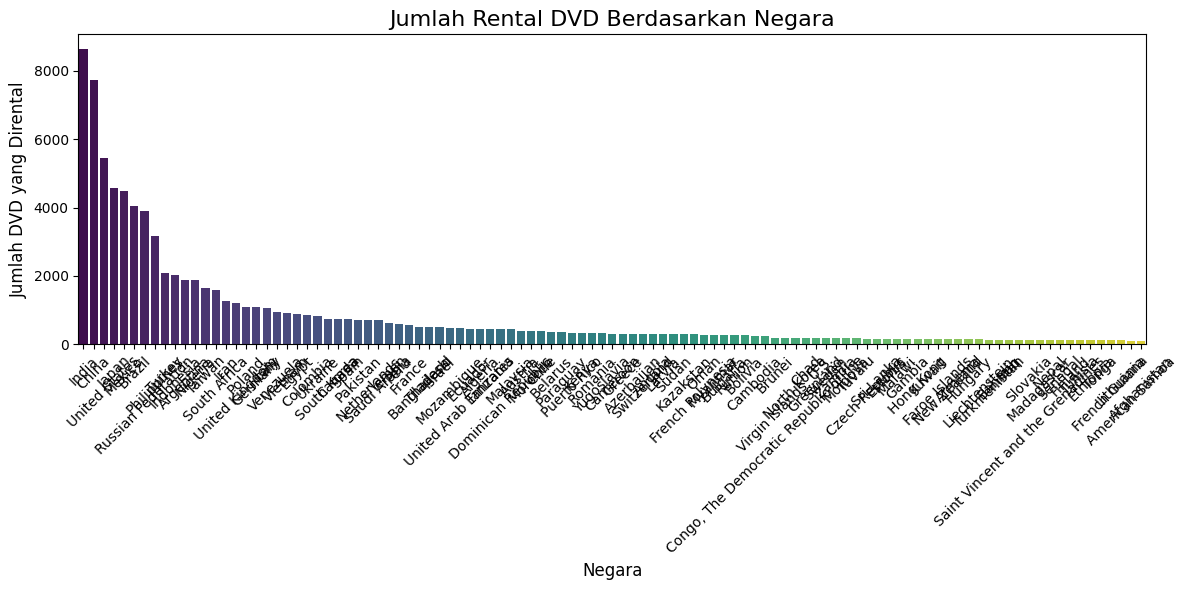

In [ ]:
# Konversi hasil groupby menjadi DataFrame
byCountry_df = byCountry.reset_index()
byCountry_df.columns = ['country', 'count']  # Memberi nama kolom

# Visualisasi dengan seaborn
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(x='country', y='count', data=byCountry_df, palette='viridis')

plt.title("Jumlah Rental DVD Berdasarkan Negara", fontsize=16)
plt.xlabel("Negara", fontsize=12)
plt.ylabel("Jumlah DVD yang Dirental", fontsize=12)
plt.xticks(rotation=45)  # Memiringkan label x agar mudah dibaca

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

              country  count
0               India   8637
1               China   7724
2       United States   5452
3               Japan   4565
4              Mexico   4493
5              Brazil   4042
6  Russian Federation   3895
7         Philippines   3160
8              Turkey   2094
9           Indonesia   2014


<ipython-input-11-3c11d6453845>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='country', x='count', data=top_rentals_world, palette='viridis')


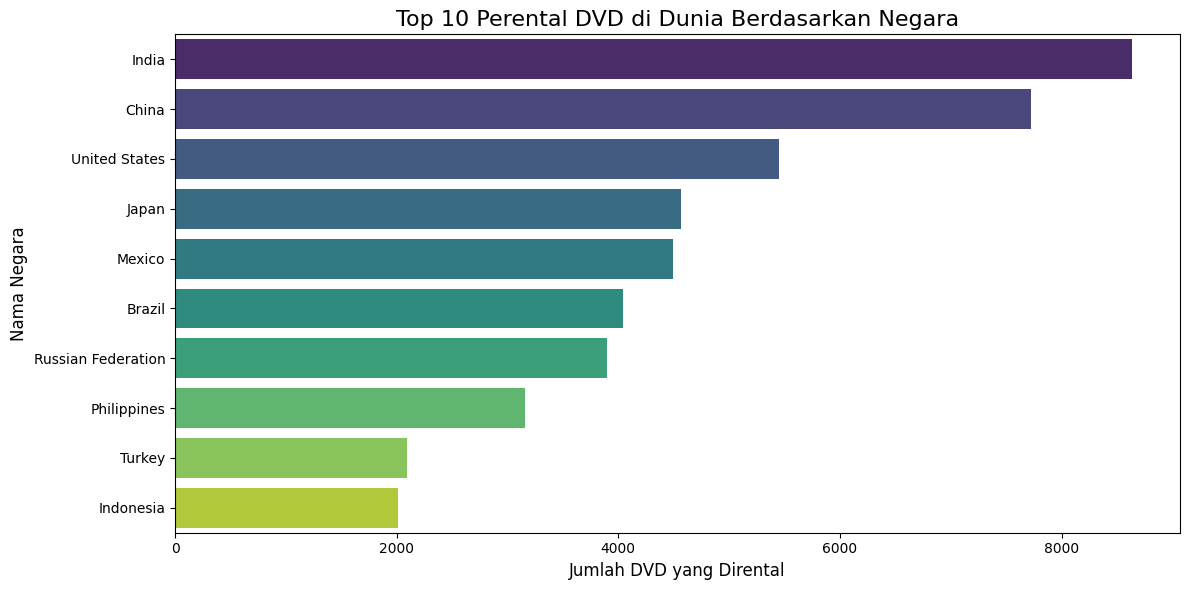

In [ ]:
# Menampilkan 10 judul film terbanyak
top_rentals_world = byCountry_df.head(10)
print(top_rentals_world)

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='country', x='count', data=top_rentals_world, palette='viridis')

plt.title("Top 10 Perental DVD di Dunia Berdasarkan Negara", fontsize=16)
plt.ylabel("Nama Negara", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

### **Jumlah Perental di Indonesia**

In [ ]:
# Filter hanya untuk country "Indonesia"
indonesia_data = rentaldvd3_df[rentaldvd3_df["country"] == "Indonesia"]

# Groupby berdasarkan judul film untuk menghitung jumlah penyewa
rental_count_per_title = (
    indonesia_data.groupby(by="title")
    .size()  # Menghitung jumlah penyewaan per judul
    .sort_values(ascending=False)  # Mengurutkan dari terbanyak ke sedikit
)

# Total jumlah semua penyewa di Indonesia
total_rentals = rental_count_per_title.sum()

# Menampilkan hasil
print(f"Total penyewa di Indonesia berdasarkan judul film: \n{rental_count_per_title}")
print(f"\nJumlah total penyewa di Indonesia: {total_rentals}")

Total penyewa di Indonesia berdasarkan judul film: 
title
Crazy Home           26
Necklace Outbreak    24
Minds Truman         18
Crooked Frogmen      18
Metropolis Coma      18
                     ..
Baked Cleopatra       1
Forever Candidate     1
Maltese Hope          1
Dwarfs Alter          1
Yentl Idaho           1
Length: 306, dtype: int64

Jumlah total penyewa di Indonesia: 2014


<ipython-input-219-9d8e15f78208>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='count', data=rental_count_per_title_df, palette='viridis')


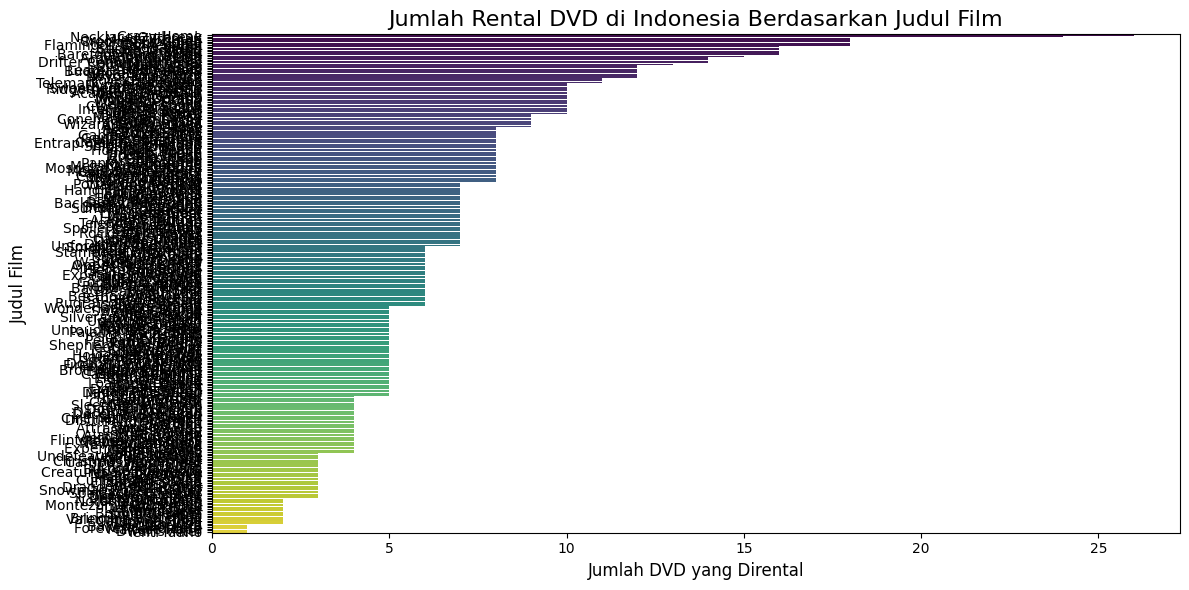

In [ ]:
# Konversi hasil menjadi DataFrame
rental_count_per_title_df = rental_count_per_title.reset_index()
rental_count_per_title_df.columns = ['title', 'count']

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='title', x='count', data=rental_count_per_title_df, palette='viridis')

plt.title("Jumlah Rental DVD di Indonesia Berdasarkan Judul Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

                   title  count
0             Crazy Home     26
1      Necklace Outbreak     24
2           Minds Truman     18
3        Crooked Frogmen     18
4        Metropolis Coma     18
5            Born Spinal     18
6  Flamingos Connecticut     18
7             Sea Virgin     16
8        Suspects Quills     16
9           Horn Working     16


<ipython-input-220-47d51c048d88>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='count', data=top_rentals, palette='viridis')


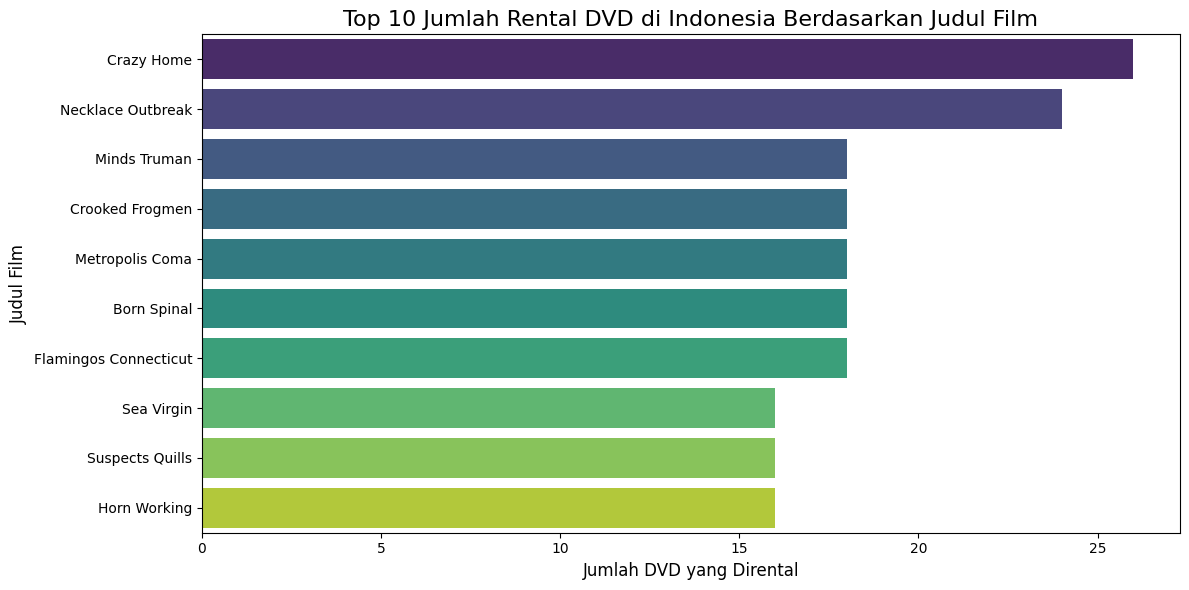

In [ ]:
# Menampilkan 10 judul film terbanyak
top_rentals = rental_count_per_title_df.head(10)
print(top_rentals)

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='title', x='count', data=top_rentals, palette='viridis')

plt.title("Top 10 Jumlah Rental DVD di Indonesia Berdasarkan Judul Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

### **Jumlah Perental di India**

In [ ]:
# Filter hanya untuk country "India"
india_data = rentaldvd3_df[rentaldvd3_df["country"] == "India"]

# Groupby berdasarkan judul film untuk menghitung jumlah penyewa
rental_count_india = (
    india_data.groupby(by="title")
    .size()  # Menghitung jumlah penyewaan per judul
    .sort_values(ascending=False)  # Mengurutkan dari terbanyak ke sedikit
)

# Total jumlah semua penyewa di India
total_india = rental_count_india.sum()

# Menampilkan hasil
print(f"Total penyewa di India berdasarkan judul film: \n{rental_count_india}")
print(f"\nJumlah total penyewa di India: {total_india}")

Total penyewa di India berdasarkan judul film: 
title
Fiction Christmas      56
Mask Peach             55
Wife Turn              54
Splendor Patton        50
Hellfighters Sierra    48
                       ..
Minority Kiss           1
Ghostbusters Elf        1
Maltese Hope            1
Yentl Idaho             1
Moon Bunch              1
Length: 744, dtype: int64

Jumlah total penyewa di India: 8637


<ipython-input-226-6a512d515cfa>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='count', data=rental_count_india_df, palette='viridis')


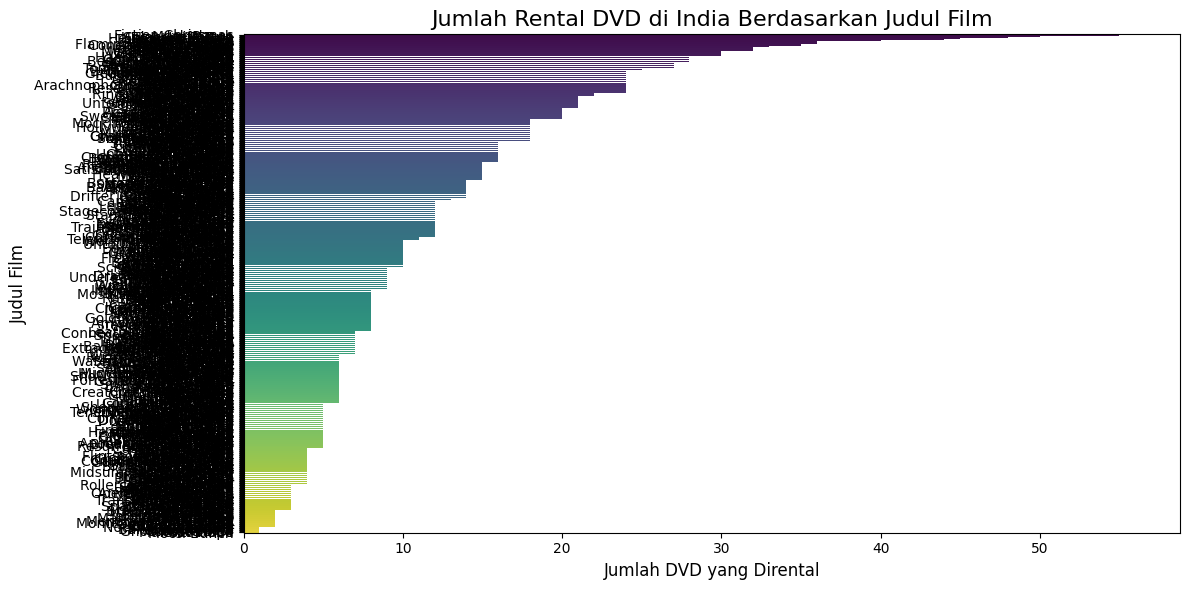

In [ ]:
# Konversi hasil menjadi DataFrame
rental_count_india_df = rental_count_india.reset_index()
rental_count_india_df.columns = ['title', 'count']

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='title', x='count', data=rental_count_india_df, palette='viridis')

plt.title("Jumlah Rental DVD di India Berdasarkan Judul Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

                 title  count
0    Fiction Christmas     56
1           Mask Peach     55
2            Wife Turn     54
3      Splendor Patton     50
4  Hellfighters Sierra     48
5         Family Sweet     45
6     Fantasy Troopers     45
7     Instinct Airport     44
8      Idols Snatchers     40
9        Jerk Paycheck     40


<ipython-input-227-331497b5f133>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='count', data=top_rentals, palette='viridis')


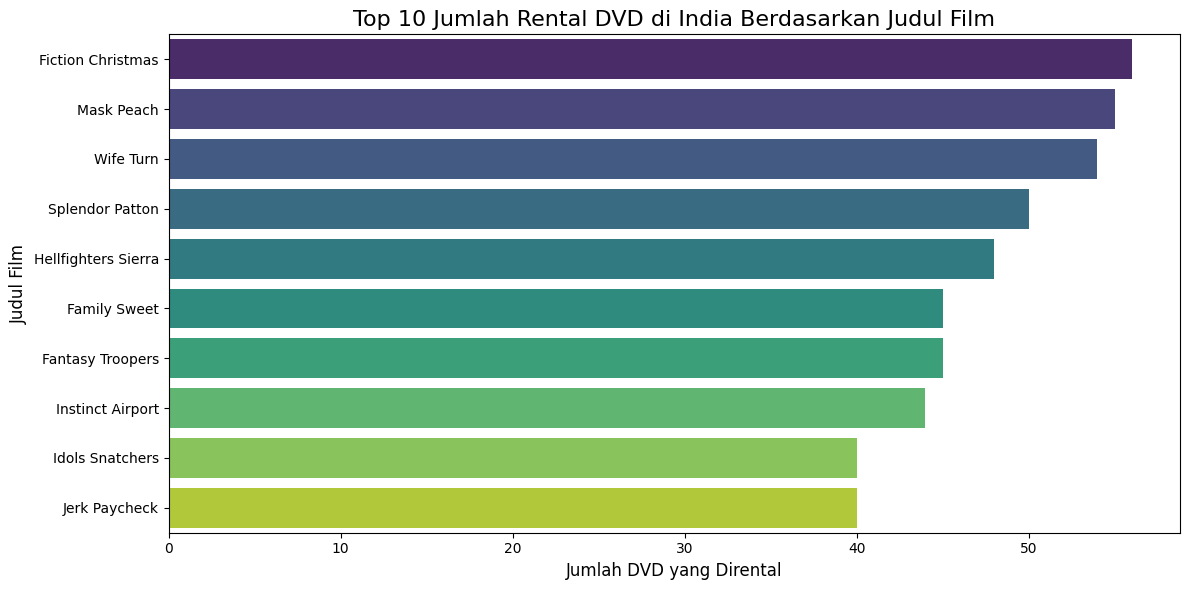

In [ ]:
# Menampilkan 10 judul film terbanyak
top_rentals = rental_count_india_df.head(10)
print(top_rentals)

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='title', x='count', data=top_rentals, palette='viridis')

plt.title("Top 10 Jumlah Rental DVD di India Berdasarkan Judul Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

### **Jumlah Perental di China**

In [ ]:
# Filter hanya untuk country "China"
china_data = rentaldvd3_df[rentaldvd3_df["country"] == "China"]

# Groupby berdasarkan judul film untuk menghitung jumlah penyewa
rental_count_china = (
    china_data.groupby(by="title")
    .size()  # Menghitung jumlah penyewaan per judul
    .sort_values(ascending=False)  # Mengurutkan dari terbanyak ke sedikit
)

# Total jumlah semua penyewa di China
total_china = rental_count_china.sum()

# Menampilkan hasil
print(f"Total penyewa di China berdasarkan judul film: \n{rental_count_china}")
print(f"\nJumlah total penyewa di China: {total_china}")

Total penyewa di China berdasarkan judul film: 
title
Oz Liaisons         55
Wedding Apollo      50
House Dynamite      45
Balloon Homeward    42
Cleopatra Devil     42
                    ..
Hunger Roof          2
Dwarfs Alter         1
Pirates Roxanne      1
Ghostbusters Elf     1
Miracle Virtual      1
Length: 718, dtype: int64

Jumlah total penyewa di China: 7724


<ipython-input-20-d22ead3b3bc9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='count', data=rental_count_china_df, palette='viridis')


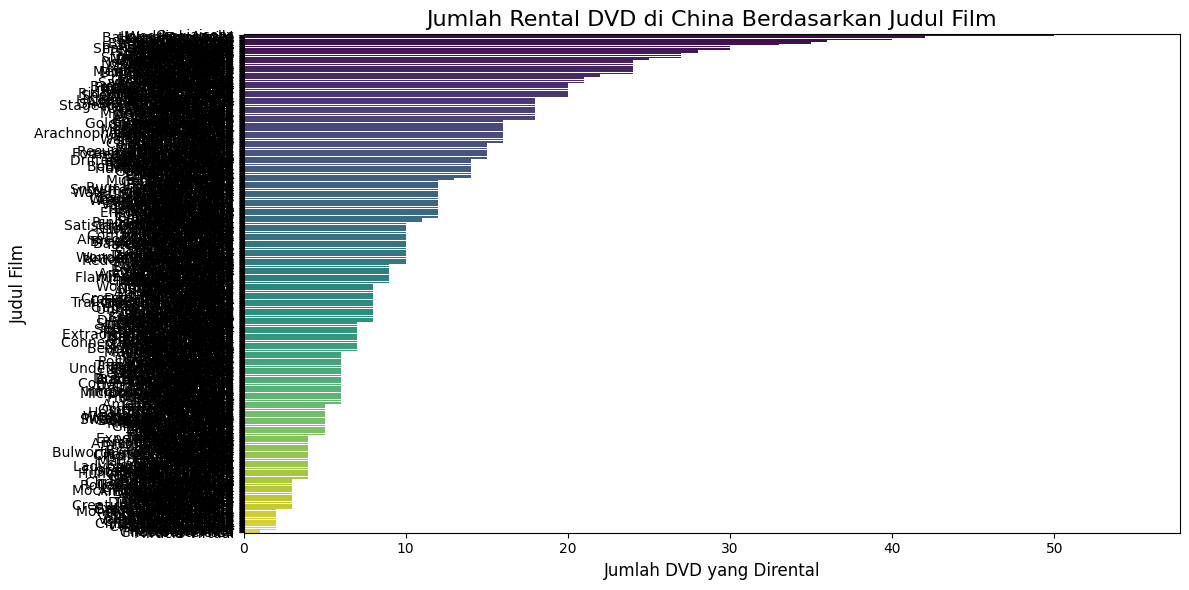

In [ ]:
# Konversi hasil menjadi DataFrame
rental_count_china_df = rental_count_china.reset_index()
rental_count_china_df.columns = ['title', 'count']

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='title', x='count', data=rental_count_china_df, palette='viridis')

plt.title("Jumlah Rental DVD di China Berdasarkan Judul Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

              title  count
0       Oz Liaisons     55
1    Wedding Apollo     50
2    House Dynamite     45
3  Balloon Homeward     42
4   Cleopatra Devil     42
5        Story Side     40
6   Storm Happiness     40
7      Hobbit Alien     40
8     Kick Savannah     36
9  Patton Interview     36


<ipython-input-21-dac7d335cea5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='count', data=top_rentals, palette='viridis')


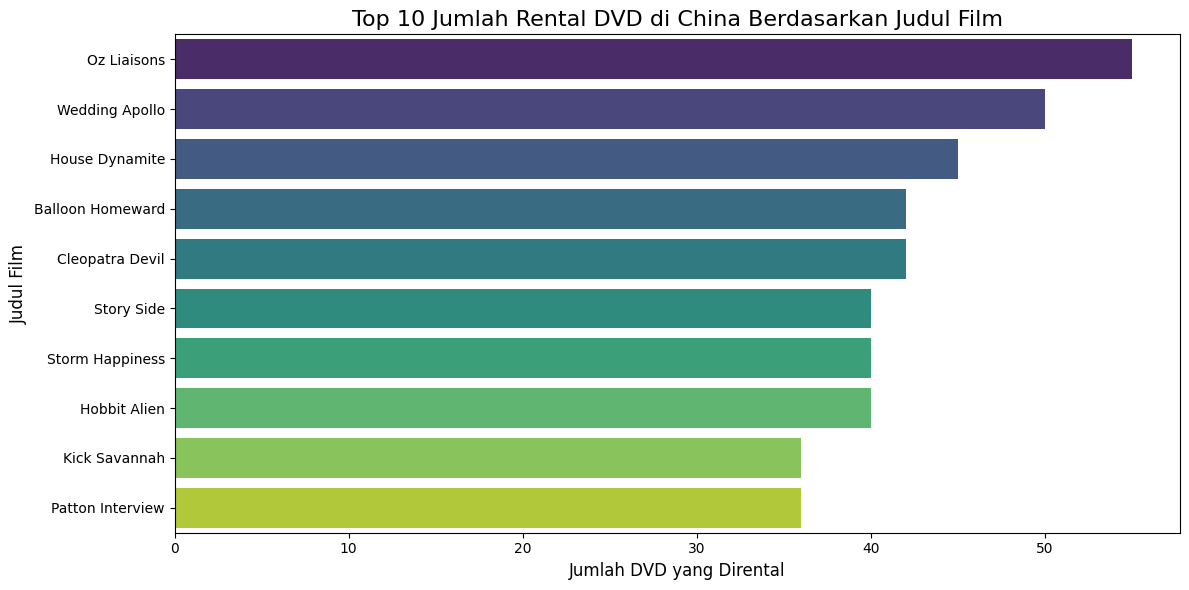

In [ ]:
# Menampilkan 10 judul film terbanyak
top_rentals = rental_count_china_df.head(10)
print(top_rentals)

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='title', x='count', data=top_rentals, palette='viridis')

plt.title("Top 10 Jumlah Rental DVD di China Berdasarkan Judul Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

### **Jumlah Perental di United States**

In [ ]:
# Filter hanya untuk country "United States"
us_data = rentaldvd3_df[rentaldvd3_df["country"] == "United States"]

# Groupby berdasarkan judul film untuk menghitung jumlah penyewa
rental_count_us = (
    us_data.groupby(by="title")
    .size()  # Menghitung jumlah penyewaan per judul
    .sort_values(ascending=False)  # Mengurutkan dari terbanyak ke sedikit
)

# Total jumlah semua penyewa di India
total_us = rental_count_us.sum()

# Menampilkan hasil
print(f"Total penyewa di United States berdasarkan judul film: \n{rental_count_us}")
print(f"\nJumlah total penyewa di United States: {total_us}")

Total penyewa di United States berdasarkan judul film: 
title
Sleuth Orient             42
Dracula Crystal           39
Telemark Heartbreakers    33
Submarine Bed             33
Cupboard Sinners          32
                          ..
Pirates Roxanne            1
Musketeers Wait            1
Yentl Idaho                1
Stone Fire                 1
Ferris Mother              1
Length: 596, dtype: int64

Jumlah total penyewa di United States: 5452


<ipython-input-23-b63359d552bc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='count', data=rental_count_us_df, palette='viridis')


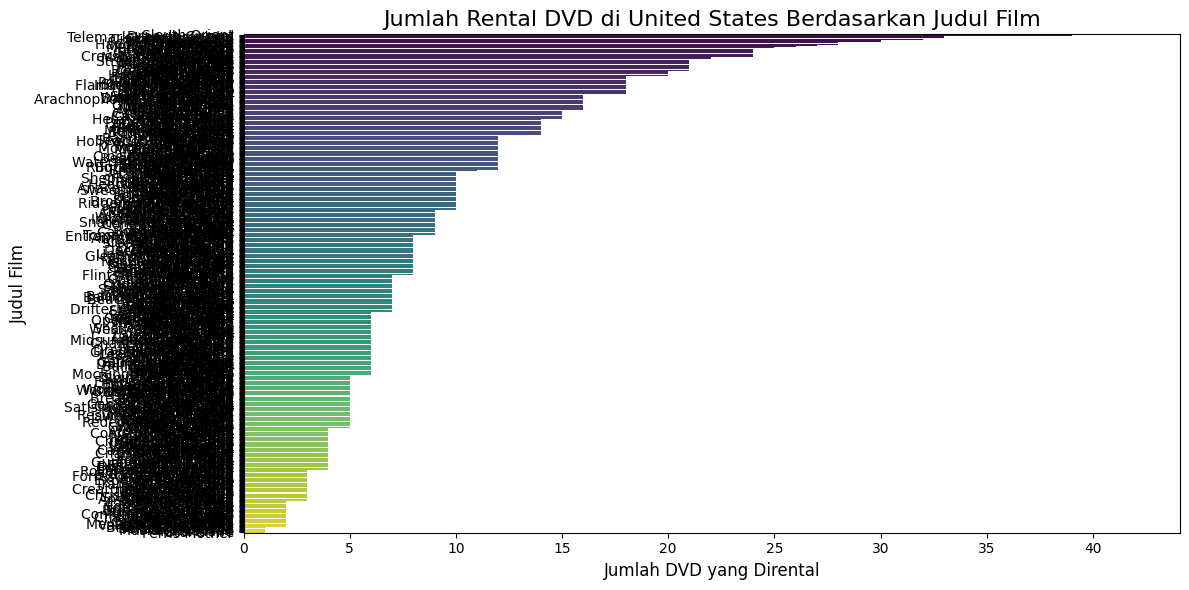

In [ ]:
# Konversi hasil menjadi DataFrame
rental_count_us_df = rental_count_us.reset_index()
rental_count_us_df.columns = ['title', 'count']

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='title', x='count', data=rental_count_us_df, palette='viridis')

plt.title("Jumlah Rental DVD di United States Berdasarkan Judul Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

                    title  count
0           Sleuth Orient     42
1         Dracula Crystal     39
2  Telemark Heartbreakers     33
3           Submarine Bed     33
4        Cupboard Sinners     32
5         Scorpion Apollo     32
6                Spy Mile     32
7           Jungle Closer     30
8          Wedding Apollo     30
9              Frost Head     28


<ipython-input-24-0e36f0ca41ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='title', x='count', data=top_rentals, palette='viridis')


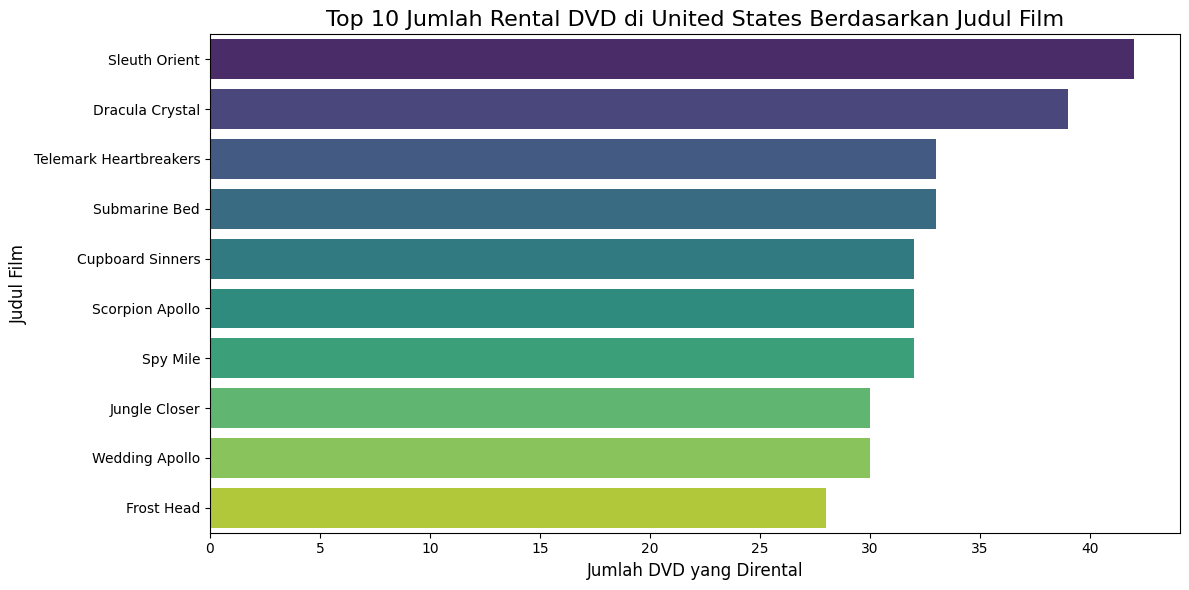

In [ ]:
# Menampilkan 10 judul film terbanyak
top_rentals = rental_count_us_df.head(10)
print(top_rentals)

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='title', x='count', data=top_rentals, palette='viridis')

plt.title("Top 10 Jumlah Rental DVD di United States Berdasarkan Judul Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah DVD yang Dirental", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

### **Genre Paling Diminati**

In [ ]:
byGenre = (
    rentaldvd3_df.groupby(by="name")["country"]
    .size()  # Menghitung jumlah data di setiap grup
    .sort_values(ascending=False)  # Mengurutkan dari besar ke kecil
)

print(byGenre)

name
Sports         6918
Animation      6582
Action         6270
Documentary    6146
Drama          5858
Sci-Fi         5686
Family         5583
Foreign        5532
Children       5467
New            5193
Classics       5063
Horror         4898
Comedy         4637
Travel         4632
Games          4510
Music          4461
Name: country, dtype: int64


In [ ]:
byGenre = (
    rentaldvd3_df.groupby(by="name")["country"]
    .size()  # Menghitung jumlah data di setiap grup
    .sort_values(ascending=False)  # Mengurutkan dari besar ke kecil
)

print(byGenre)

name
Sports         6918
Animation      6582
Action         6270
Documentary    6146
Drama          5858
Sci-Fi         5686
Family         5583
Foreign        5532
Children       5467
New            5193
Classics       5063
Horror         4898
Comedy         4637
Travel         4632
Games          4510
Music          4461
Name: country, dtype: int64


<ipython-input-27-2ef711cf9f9d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genre', y='count', data=byGenre_df, palette='viridis')


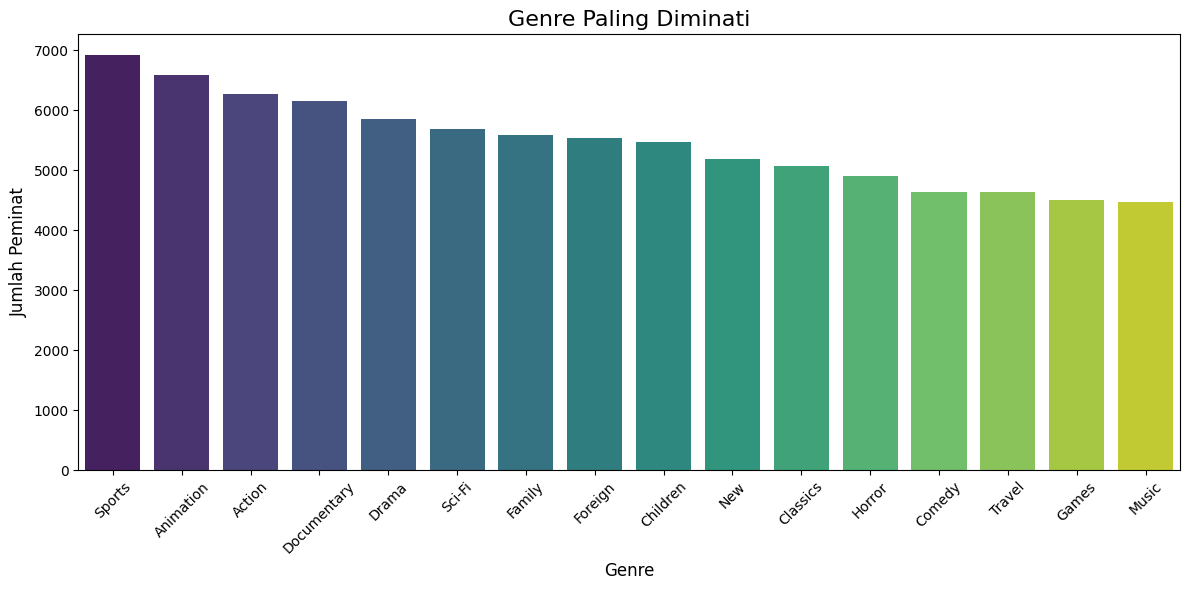

In [ ]:
# Konversi hasil groupby menjadi DataFrame
byGenre_df = byGenre.reset_index()
byGenre_df.columns = ['genre', 'count']  # Memberi nama kolom

# Visualisasi dengan seaborn
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(x='genre', y='count', data=byGenre_df, palette='viridis')

plt.title("Genre Paling Diminati", fontsize=16)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Jumlah Peminat", fontsize=12)
plt.xticks(rotation=45)  # Memiringkan label x agar mudah dibaca

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

         genre  count
0       Sports   6918
1    Animation   6582
2       Action   6270
3  Documentary   6146
4        Drama   5858
5       Sci-Fi   5686
6       Family   5583
7      Foreign   5532
8     Children   5467
9          New   5193


<ipython-input-28-c1cf2456a7cb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='genre', x='count', data=top_genre, palette='viridis')


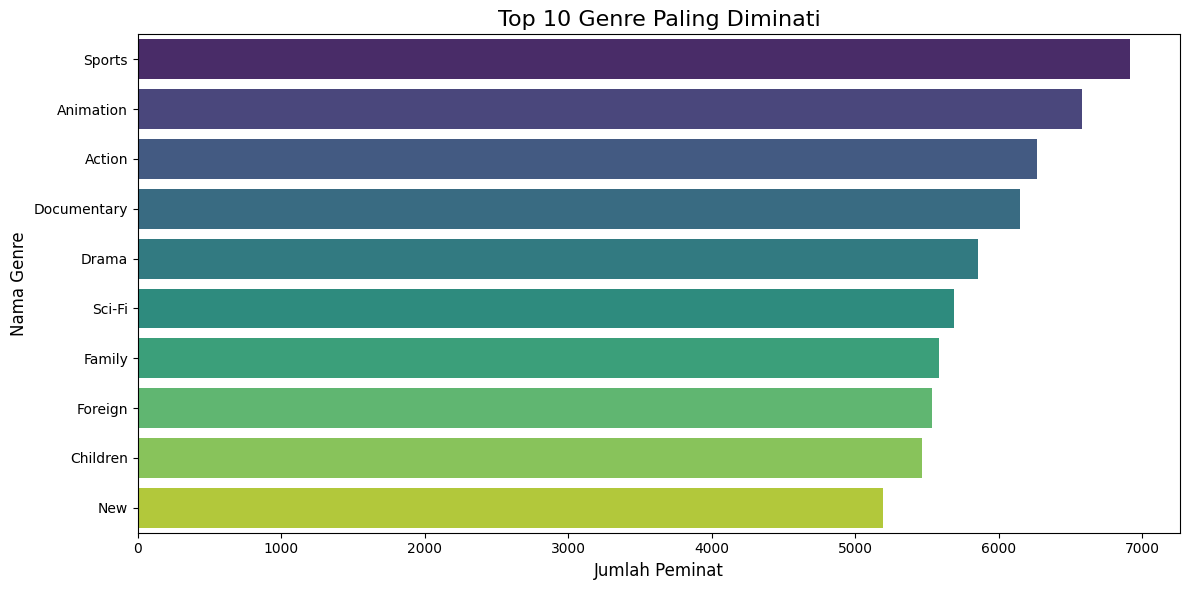

In [ ]:
# Menampilkan 10 Genre Paling Diminati
top_genre = byGenre_df.head(10)
print(top_genre)

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='genre', x='count', data=top_genre, palette='viridis')

plt.title("Top 10 Genre Paling Diminati", fontsize=16)
plt.ylabel("Nama Genre", fontsize=12)
plt.xlabel("Jumlah Peminat", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

### **Penghasilan Rata-Rata setiap Film yang Dirental**

In [ ]:
byMean = (
    rentaldvd3_df.groupby(by="title")["amount"]
    .mean()  # Menghitung jumlah data di setiap grup
    .sort_values(ascending=False)  # Mengurutkan dari besar ke kecil
)

print(byMean)

title
Hustler Party          8.704286
Tycoon Gathering       8.656667
Telegraph Voyage       8.300205
Paths Control          8.190000
Backlash Undefeated    8.072279
                         ...   
Freedom Cleopatra      1.190000
Hollywood Anonymous    1.066923
Young Language         0.990000
Texas Watch            0.990000
Oklahoma Jumanji       0.990000
Name: amount, Length: 955, dtype: float64


<ipython-input-30-b96d4b1d4456>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='judul', y='mean', data=byMean_df, palette='viridis')


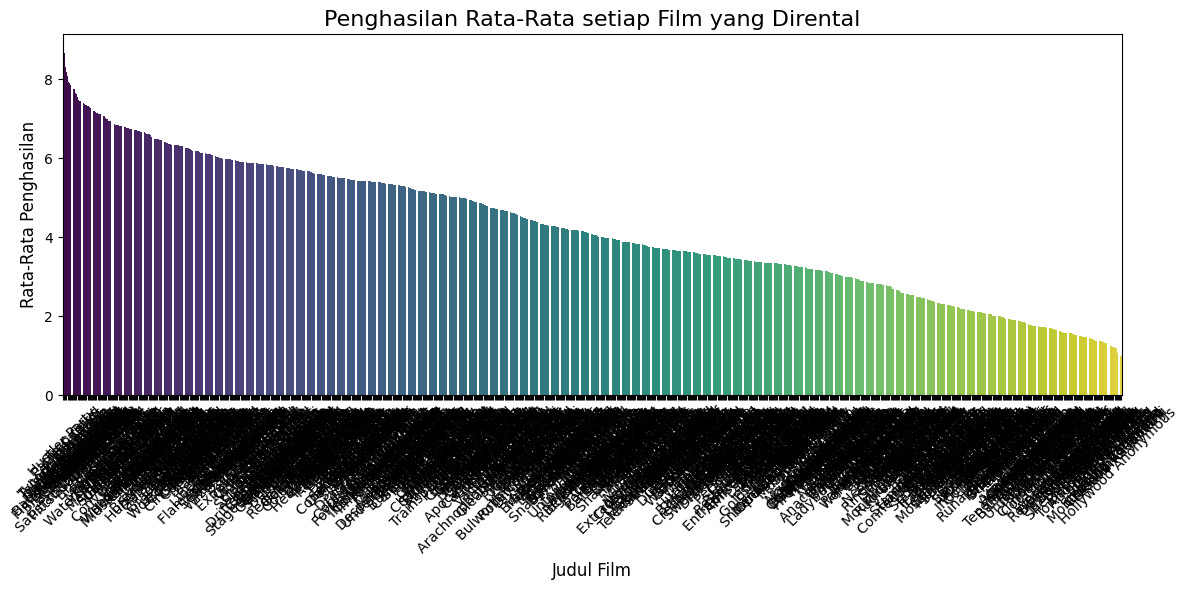

In [ ]:
# Konversi hasil groupby menjadi DataFrame
byMean_df = byMean.reset_index()
byMean_df.columns = ['judul', 'mean']  # Memberi nama kolom

# Visualisasi dengan seaborn
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(x='judul', y='mean', data=byMean_df, palette='viridis')

plt.title("Penghasilan Rata-Rata setiap Film yang Dirental", fontsize=16)
plt.xlabel("Judul Film", fontsize=12)
plt.ylabel("Rata-Rata Penghasilan", fontsize=12)
plt.xticks(rotation=45)  # Memiringkan label x agar mudah dibaca

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

                   judul      mean
0          Hustler Party  8.704286
1       Tycoon Gathering  8.656667
2       Telegraph Voyage  8.300205
3          Paths Control  8.190000
4    Backlash Undefeated  8.072279
5  Flintstones Happiness  7.931176
6      Caribbean Liberty  7.899752
7       Virtual Spoilers  7.860555
8       Daughter Madigan  7.767778
9              Trap Guys  7.751735


<ipython-input-33-2526ab30b2d4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='judul', x='mean', data=top_mean, palette='viridis') # Use top_mean as data source


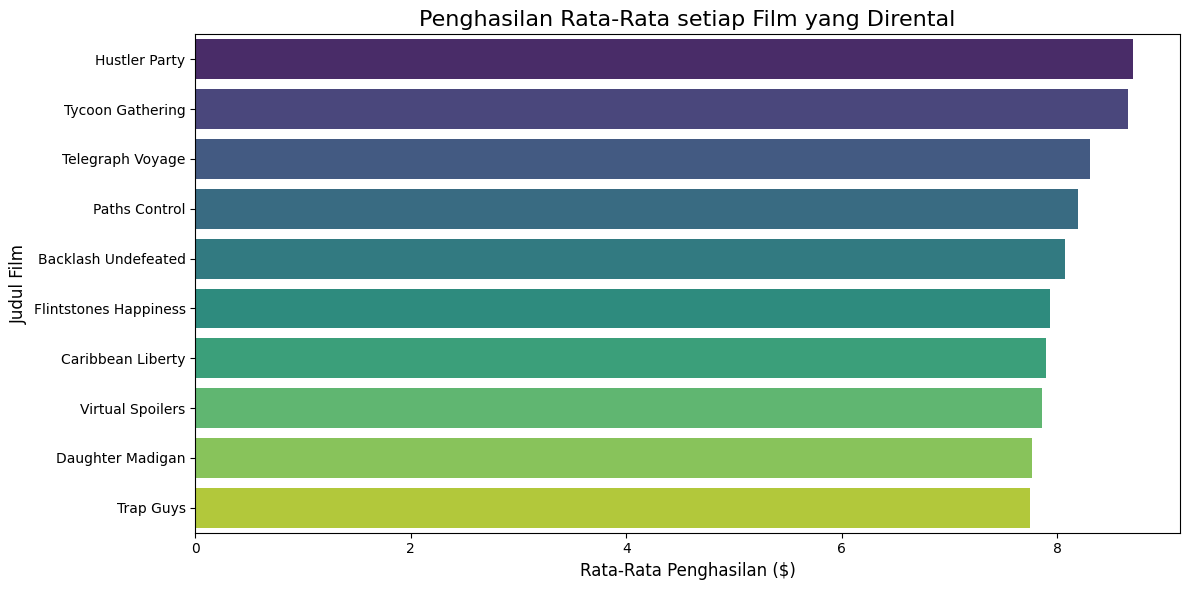

In [ ]:
# Menampilkan 10 Penghasilan Teratas
top_mean = byMean_df.head(10)
print(top_mean)  # Print top_mean instead of top_genre

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='judul', x='mean', data=top_mean, palette='viridis') # Use top_mean as data source

plt.title("Penghasilan Rata-Rata setiap Film yang Dirental", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Rata-Rata Penghasilan ($)", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

### **Jumlah Penghasilan setiap Film yang Dirental**

In [ ]:
bySum = (
    rentaldvd3_df.groupby(by="title")["amount"]
    .size()  # Menghitung jumlah data di setiap grup
    .sort_values(ascending=False)  # Mengurutkan dari besar ke kecil
)

print(bySum)

title
Juggler Hardly            279
Titanic Boondock          276
Telemark Heartbreakers    275
Dracula Crystal           273
Oz Liaisons               264
                         ... 
Lolita World               10
Dwarfs Alter                9
Dolls Rage                  9
Miracle Virtual             9
Ghostbusters Elf            9
Name: amount, Length: 955, dtype: int64


<ipython-input-35-b76d1270c6c3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='judul', y='jumlah', data=bySum_df, palette='viridis')


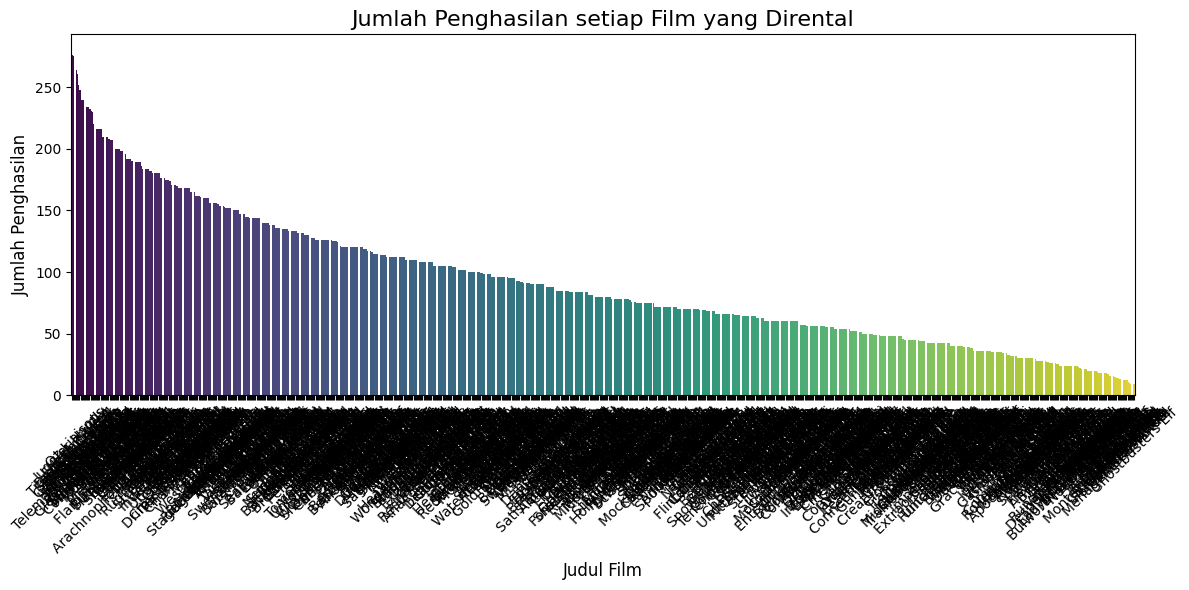

In [ ]:
# Konversi hasil groupby menjadi DataFrame
bySum_df = bySum.reset_index()
bySum_df.columns = ['judul', 'jumlah']  # Memberi nama kolom

# Visualisasi dengan seaborn
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(x='judul', y='jumlah', data=bySum_df, palette='viridis')

plt.title("Jumlah Penghasilan setiap Film yang Dirental", fontsize=16)
plt.xlabel("Judul Film", fontsize=12)
plt.ylabel("Jumlah Penghasilan", fontsize=12)
plt.xticks(rotation=45)  # Memiringkan label x agar mudah dibaca

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

                    judul  jumlah
0          Juggler Hardly     279
1        Titanic Boondock     276
2  Telemark Heartbreakers     275
3         Dracula Crystal     273
4             Oz Liaisons     264
5            Family Sweet     261
6          Saturday Lambs     252
7       Goodfellas Salute     248
8            Hobbit Alien     248
9         Idols Snatchers     240


<ipython-input-36-efeae705148f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='judul', x='jumlah', data=top_sum, palette='viridis')


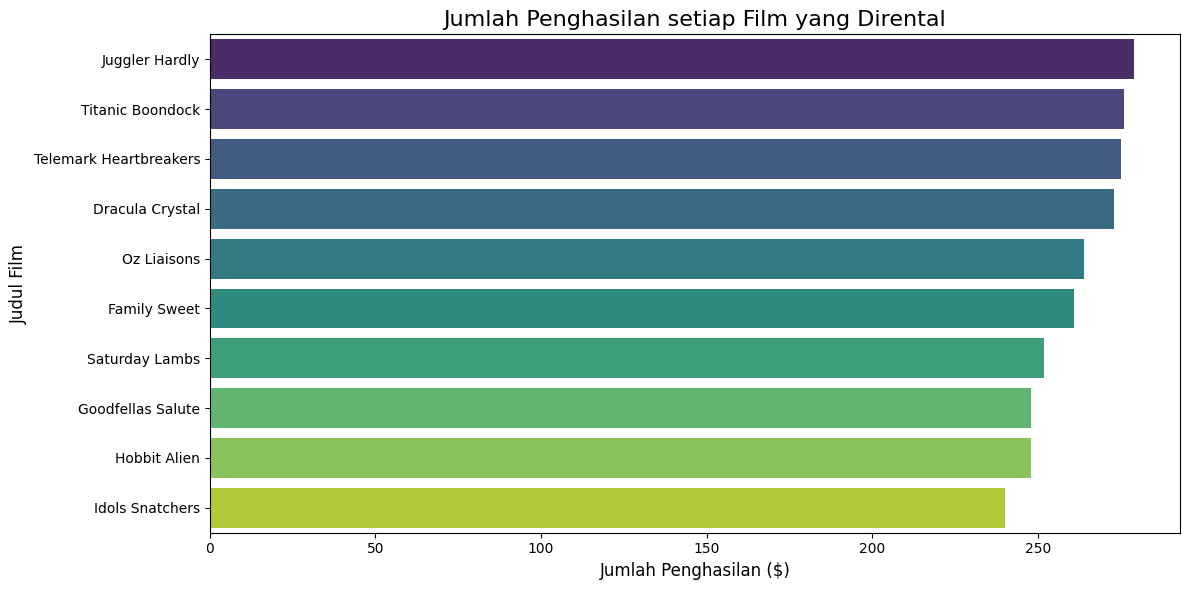

In [ ]:
# Menampilkan 10 Jumlah Penghasilan Teratas
top_sum = bySum_df.head(10)
print(top_sum)

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='judul', x='jumlah', data=top_sum, palette='viridis')

plt.title("Jumlah Penghasilan setiap Film yang Dirental", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah Penghasilan ($)", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

### **Durasi Rental Setiap Film**

In [ ]:
byDuration = (
    rentaldvd3_df.groupby(by="title")["rental_duration"]
    .size()  # Menghitung jumlah data di setiap grup
    .sort_values(ascending=False)  # Mengurutkan dari besar ke kecil
)

print(byDuration)

title
Juggler Hardly            279
Titanic Boondock          276
Telemark Heartbreakers    275
Dracula Crystal           273
Oz Liaisons               264
                         ... 
Lolita World               10
Dwarfs Alter                9
Dolls Rage                  9
Miracle Virtual             9
Ghostbusters Elf            9
Name: rental_duration, Length: 955, dtype: int64


<ipython-input-38-c8f81621da6d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='judul', y='durasi', data=byDuration_df, palette='viridis')


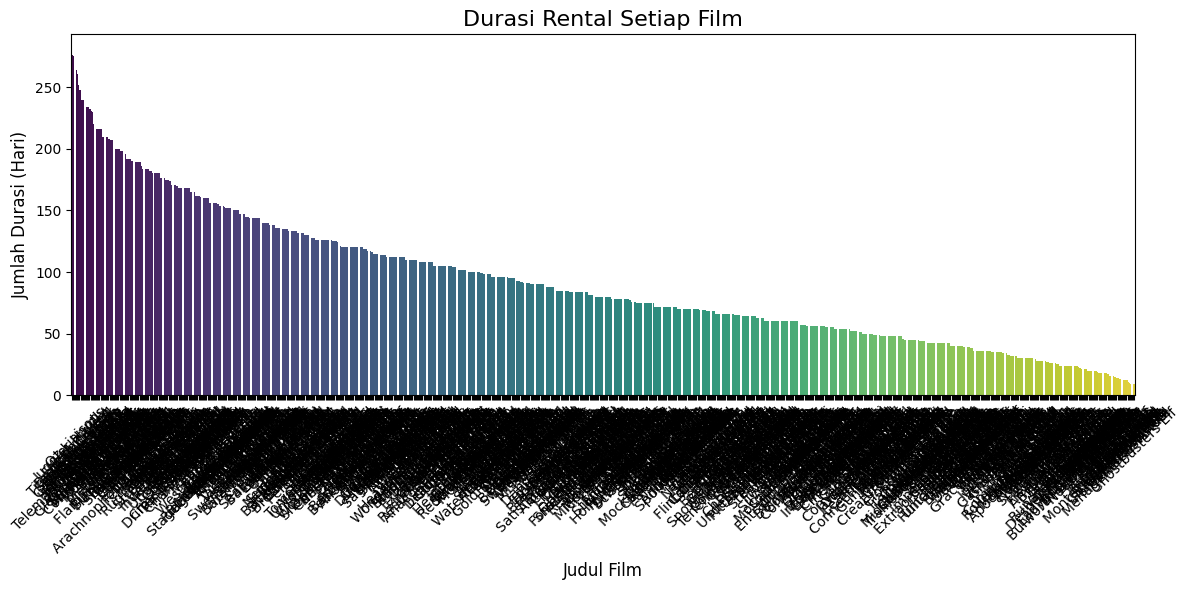

In [ ]:
# Konversi hasil groupby menjadi DataFrame
byDuration_df = byDuration.reset_index()
byDuration_df.columns = ['judul', 'durasi']  # Memberi nama kolom

# Visualisasi dengan seaborn
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(x='judul', y='durasi', data=byDuration_df, palette='viridis')

plt.title("Durasi Rental Setiap Film", fontsize=16)
plt.xlabel("Judul Film", fontsize=12)
plt.ylabel("Jumlah Durasi (Hari)", fontsize=12)
plt.xticks(rotation=45)  # Memiringkan label x agar mudah dibaca

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

                    judul  durasi
0          Juggler Hardly     279
1        Titanic Boondock     276
2  Telemark Heartbreakers     275
3         Dracula Crystal     273
4             Oz Liaisons     264
5            Family Sweet     261
6          Saturday Lambs     252
7       Goodfellas Salute     248
8            Hobbit Alien     248
9         Idols Snatchers     240


<ipython-input-39-702c14262aba>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='judul', x='durasi', data=top_durasi, palette='viridis')


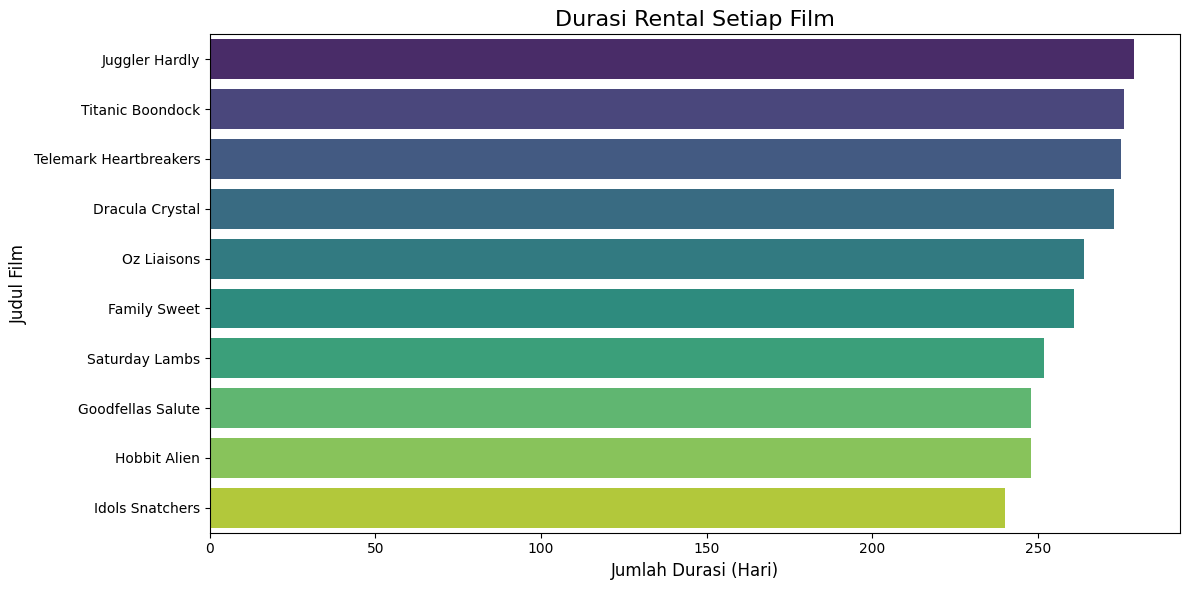

In [ ]:
# Menampilkan 10 Jumlah Waktu Rental Terbanyak
top_durasi = byDuration_df.head(10)
print(top_durasi)

# Visualisasi dengan seaborn (bar chart horizontal)
plt.figure(figsize=(12, 6))  # Ukuran grafik
sns.barplot(y='judul', x='durasi', data=top_durasi, palette='viridis')

plt.title("Durasi Rental Setiap Film", fontsize=16)
plt.ylabel("Judul Film", fontsize=12)
plt.xlabel("Jumlah Durasi (Hari)", fontsize=12)

plt.tight_layout()  # Mengatur tata letak agar tidak tumpang tindih
plt.show()

# **Customer Segmentation**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Mengambil fitur 'country' dari dataset
country_num = rentaldvd3_df.iloc[:, [23]]

# Menampilkan data sebelum encoding
print("Sebelum Label Encoding:")
print(country_num.head())

# Inisialisasi OrdinalEncoder
encoder = OrdinalEncoder()

# Transformasi data
country_num_encoded = country_num.copy()  # Salin DataFrame agar tidak mengubah aslinya
country_num_encoded.iloc[:, 0] = encoder.fit_transform(country_num_encoded)

# Menampilkan hasil setelah encoding
print("\nSetelah Label Encoding:")
print(country_num_encoded.head())

Sebelum Label Encoding:
   country
0     Iran
1   Turkey
2  Bolivia
3     Iran
4   Turkey

Setelah Label Encoding:
   country
0     42.0
1     92.0
2     11.0
3     42.0
4     92.0


In [ ]:
rentaldvd3_df.head()

,title,description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,...,amount,payment_date,address,district,city,country,language,name_encoded,genre_encoded,genre_decoded
0,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,3.99,2007-03-21 19:56:09.996577,600 Bradford Street,East Azerbaidzan,Tabriz,Iran,English,5,5,5
1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,3.99,2007-03-02 18:41:36.996577,680 A Corua (La Corua) Manor,Sivas,Sivas,Turkey,English,5,5,5
2,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,0.99,2007-04-08 17:31:41.996577,287 Cuautla Boulevard,Chuquisaca,Sucre,Bolivia,English,5,5,5
3,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,3.99,2007-03-21 19:56:09.996577,600 Bradford Street,East Azerbaidzan,Tabriz,Iran,English,5,5,5
4,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006.0,6.0,0.99,86.0,20.99,PG,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...,...,3.99,2007-03-02 18:41:36.996577,680 A Corua (La Corua) Manor,Sivas,Sivas,Turkey,English,5,5,5


In [ ]:
# Mengambil kolom ke-4 (index 3) dari DataFrame asli
result = rentaldvd3_df.iloc[:, [3]].copy()

# Menambahkan hasil label encoding ke dalam DataFrame
result["country_encoded"] = country_num_encoded.values

# Menampilkan hasil
result.head()

,rental_duration,country_encoded
0,6.0,42.0
1,6.0,92.0
2,6.0,11.0
3,6.0,42.0
4,6.0,92.0


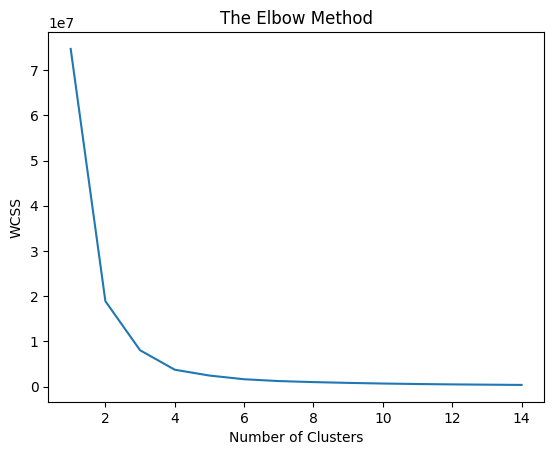

In [ ]:
wcss = [] # wcss -> Within Cluster Sum of Squares

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=14, n_init=10)
    kmeans.fit(result)
    wcss.append(kmeans.inertia_)

# Visualisasi Metode Elbow
plt.plot(range(1, 15), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
# Pakai cluster sesuai keinginan
kmeans = KMeans(n_clusters = 4, random_state = 14)
kmeans.fit(result)

KMeans(n_clusters=4, random_state=14)

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(result, kmeans.labels_)
print(f"Silhouette Score for 2 Clusters: {silhouette_avg}")

Silhouette Score for 2 Clusters: 0.653143823109107


In [ ]:
kmeans.labels_

array([2, 3, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
hasil_kmeans = result.copy()
hasil_kmeans["cluster"] = kmeans.labels_
hasil_kmeans.head()

,rental_duration,country_encoded,cluster
0,6.0,42.0,2
1,6.0,92.0,3
2,6.0,11.0,0
3,6.0,42.0,2
4,6.0,92.0,3


<ipython-input-213-9773dc406189>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_x, y=cluster_y, palette='viridis') # Changed to named arguments


Text(0, 0.5, 'Frekuensi')

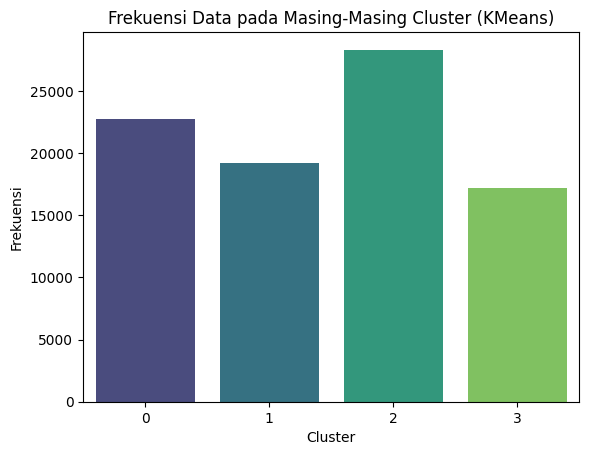

In [ ]:
# Nilai untuk sumbu X dan Y
cluster_x = hasil_kmeans["cluster"].value_counts().index
cluster_y = hasil_kmeans["cluster"].value_counts().values

# Visualisasi
sns.barplot(x=cluster_x, y=cluster_y, palette='viridis') # Changed to named arguments
plt.title("Frekuensi Data pada Masing-Masing Cluster (KMeans)")
plt.xlabel("Cluster")
plt.ylabel("Frekuensi")

In [ ]:
# Nilai fitur/variabel dari masing-masing cluster
ann_kmeans0 = hasil_kmeans[hasil_kmeans["cluster"] == 0].iloc[:, 0]
spend_kmeans0 = hasil_kmeans[hasil_kmeans["cluster"] == 0].iloc[:, 1]
ann_kmeans1 = hasil_kmeans[hasil_kmeans["cluster"] == 1].iloc[:, 0]
spend_kmeans1 = hasil_kmeans[hasil_kmeans["cluster"] == 1].iloc[:, 1]

# Pusat dari cluster (centroid)
centroid_cluster = kmeans.cluster_centers_
centroid_cluster

array([[ 4.90354772, 15.68136458],
       [ 4.90568886, 71.76104721],
       [ 4.925748  , 44.50612879],
       [ 4.93545756, 95.14190016]])

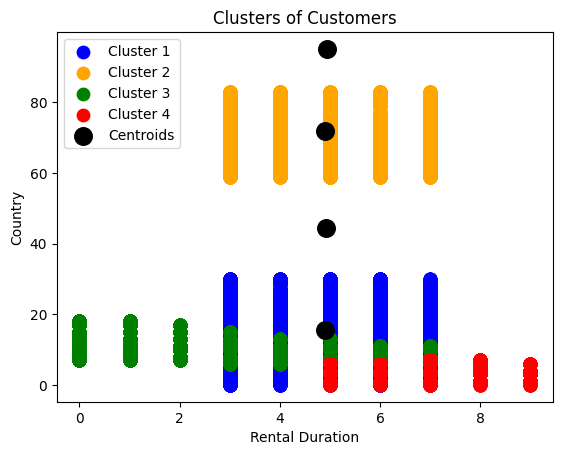

In [ ]:
# VISUALISASI HASIL CLUSTERING
plt.scatter(ann_kmeans0, spend_kmeans0, s = 80, c = "blue", label = "Cluster 1")
plt.scatter(ann_kmeans1, spend_kmeans1, s = 80, c = "orange", label = "Cluster 2")
plt.scatter(ann_kmeans2, spend_kmeans2, s = 80, c = "green", label = "Cluster 3")
plt.scatter(ann_kmeans3, spend_kmeans3, s = 80, c = "red", label = "Cluster 4")

# Centroid
plt.scatter(centroid_cluster[:, 0], centroid_cluster[:, 1], s = 160, c = "black", label = "Centroids")
plt.title("Clusters of Customers")
plt.xlabel("Rental Duration")
plt.ylabel("Country")
plt.legend()
plt.show()

In [ ]:
# Menyimpan Hasil Akhir sebagai file CSV
hasil_kmeans.to_csv("hasil_rentaldvd.csv", index=False)  # index=False untuk tidak menyimpan index

# Membuat link untuk mengunduh file
from google.colab import files
'files.download("hasil_rentaldvd.csv")'

'''
Unduh jika diperlukan.
'''

'\nUnduh jika diperlukan.\n'

### **Interpretasi Hasil Clustering**

**Dengan melihat hasil scatter plot, kita dapat mengetahui perbedaan perilaku dari customer pada masing-masing cluster sebagai berikut:**

**Cluster 1 -> Rental Duration RENDAH, Rental Rate RENDAH**

**Cluster 2 -> Rental Duration TINGGI, Rental Rate TINGGI**